<h2> Karthika Pai
<p>Lab 1</p> </h2>


<h1>Markdown in jupyter</h1>
<p>
In this lab, you will learn how to include markdown in jupyter.  To turn a cell from code to markdown just hit esc on the cell and then m (or use the dropdown above that says Code and select Markdown).  Then you can type HTML code and then hit shift-enter to run the cell.  Double-click or hit enter to edit the contents again.
</p>
<p>
<strong>Instructions:</strong> The instructions for this lab are simple.  Take a piece of code that you have from a previous course, like 141A, and then run it in jupyter and add markdown.  You should try to use as many of the html tags in the examples below as you can.  If you do not have some code of your own to show off then you can download the <a href="http://jsharpna.github.io/141B/code/OHpres1.ipynb">jupyter notebook that I showed in Monday's class</a> and add markdown to that (make educated guesses for what is going on in the cells, even though you perhaps don't know python yet).
</p>
<p>
Aside from the html tags there is also TeX for rendering math equations.  Actually there is a javascript package, MathJaX, running in the background.  You can use MathJaX on your own website in the same way.  Try modifying the equations below and if you have an opportunity to use it in your notebook then great!
</p>
<p>
When you are finished with this lab submit your notebook to canvas.
</p>

<p> </p>
<strong> For this tutorial, I have chosen the code Prof. Sharpnack had provided us in the last lecture. This code analyzes and looks at specific patterns in the dataset. This particular dataset represents data collected from the 2016 presidential election in the state of Ohio <strong>

<h1> The Program </h1>



In [22]:
import sys
reload(sys)
sys.setdefaultencoding('utf8') 

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from scipy import stats
import numpy as np

<p> The first thing to do is to import libraries. Python is a great language for data analysis; however, not all of the tools we need to perform calculations is present in its standard library. This is why we need to import tools such as pandas, matplotlib, scipy and numpy </p>

In [23]:
plt.style.use('ggplot')

<p> <strong> ggplot </strong> is a plotting system for Python that is very similar to R's ggplot2. It is known for making professional, seamless graphs very quickly with minimal code </p>

In [24]:
OH = pd.read_csv('http://jsharpna.github.io/141B/data/OHvotes.csv')

OH.head()

,County Name,Precinct Name,Precinct Code,Region Name,Media Market,Registered Voters,Total Voters,Turnout Percentage,James Jerome Bell (WI)*,Michael Bickelmeyer (WI)*,...,Joseph Maldonado (WI)*,Michael Andrew Maturen (WI)*,Evan McMullin (WI)*,Monica Moorehead (WI)*,Joe Schriner (WI)*,Mike Smith (WI)*,Jill Stein (G),Josiah R. Stroh (WI)*,Douglas W. Thomson (WI)*,Donald J. Trump (R)
0,Adams,BRATTON TOWNSHIP,AAA,Southwest,Cincinnati,923,661,71.61%,0,0,...,0,0,0,0,0,0,4,0,0,532
1,Adams,BRUSH CREEK TOWNSHIP,AAB,Southwest,Cincinnati,768,514,66.93%,0,0,...,0,0,0,0,0,0,0,0,0,390
2,Adams,LOCUST GROVE,AAD,Southwest,Cincinnati,684,522,76.32%,0,0,...,0,0,0,0,0,0,4,0,0,408
3,Adams,GREEN TOWNSHIP,AAE,Southwest,Cincinnati,409,259,63.33%,0,0,...,0,0,0,0,0,0,1,0,0,176
4,Adams,JEFFERSON TOWNSHIP,AAG,Southwest,Cincinnati,537,351,65.36%,0,0,...,0,0,0,0,0,0,2,0,0,258


<p> The first step is to read the data from the csv file. The read_csv does that and puts the values into a pandas dataframe. The documentation describes dataframes as 2-dimensional labeled data structure with columns of potentially different types. We will be interacting with the dataframe throughout the notebook. </p>
<p> The head command displays the first 5 rows of the data frame </p>

In [25]:
from locale import atof
import locale
locale.setlocale(locale.LC_NUMERIC, '')
badobj = [u'Registered Voters',u'Total Voters',u'Hillary Clinton (D)',u'Donald J. Trump (R)']
OH[badobj] = OH[badobj].applymap(lambda x: int(atof(x)))

candidates = [u'Hillary Clinton (D)',u'Gary Johnson',u'Jill Stein (G)',u'Donald J. Trump (R)']
OHred = OH[['County Name','Registered Voters','Total Voters']+candidates]
OHcounties = OHred.groupby('County Name').sum()

OHcounties.head()

,Registered Voters,Total Voters,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
County Name,,,,,,
Adams,16945,11583,2326,226,47,8659
Allen,68054,46735,13294,1486,323,30487
Ashland,35452,25104,5740,906,185,17493
Ashtabula,60624,41797,15577,1213,427,23318
Athens,45418,30042,16370,1012,539,11354


<p> This section of the code uses Python functionalities like atof, mappings and lambdas. What this part of the code essentially does is the following: </p>

* Create 6 categories that counts registered voters, total voters, those who voted for Clinton and those who voted for Trump and those who voted for Johnson and Stein.
* For each category, aggregate the number of voters by county (this is the GROUP BY clause, similar to SQL)
* Display the first 5 rows of the generated graph. 

In [42]:
DbeatsH = OHcounties['Donald J. Trump (R)'] > OHcounties['Hillary Clinton (D)']
d,h = OHcounties[DbeatsH]['Registered Voters'].mean(), OHcounties[~DbeatsH]['Registered Voters'].mean()
OHcounties['TMP'] = (OHcounties['Donald J. Trump (R)'] - OHcounties['Hillary Clinton (D)']) / OHcounties['Total Voters']
print 'Mean registered voters in Trumpland ' + str(d)
print 'Mean registered voters in Clintonland ' + str(h)
print 'Ratio (Clinton/Trump): ' + str(h/d)

<p> Sometimes we need to generate statistics about the numbers. In pandas, we can create certain restrictions on the data. The first line of the code above creates a set of counties where the voters voted more for Trump than those who voted for Clinton. (Trumpland) It also creates another set that has voters who voted more for Clinton rather than Trump (Clintonland). The second line calculates the average vote each candidate received in Trumpland or Clinton Land. Lastly it calculates the ratio over those who voted for HRC over Trump </p>

In [27]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
cmap = plt.cm.seismic

In [28]:
m = Basemap(llcrnrlon=-85,llcrnrlat=38,urcrnrlon=-80,urcrnrlat=42,
            projection='lcc',lat_1=39,lat_2=41,lon_0=-82.5)

In [29]:
m.drawmapboundary()
m.drawcounties()

<p> Often, we can use Python to generate and graph data on geographical regions. Basemap and mpl_toolkits are two libraries that we can use to create maps and draw boundaries within them. Basemap takes a set of longitudes and latitudes of the world. </p>

In [30]:
OHcnames = [(i,c['NAME']) for i,c in enumerate(m.counties_info) if c['STATE'] == 'OH']

<p> The above code generates a map if the counties within the map are in 'OH' or 'Ohio' </p>

In [31]:
ax = plt.gca()

In [32]:
for i,c in OHcnames:
    ccol = rgb2hex(cmap((OHcounties['TMP'].loc[c] + 1)/2)[:3])
    seg = m.counties[i]
    poly = Polygon(seg,facecolor=ccol,edgecolor=ccol)
    ax.add_patch(poly)

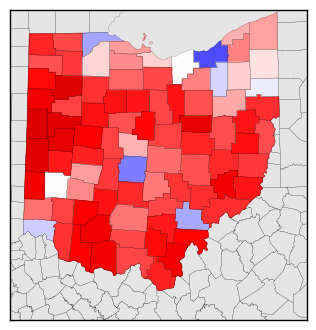

In [33]:
plt.show()

<b>OH: Percent swing from Clinton (Blue) to Trump (Red)</b>

<p> This part of the code uses the map generated by Basemap. If the county is in Ohio, it calculates the degree of which the county is in Trumpland or Clintonland. A redder shade of a county indicates that voters voted more for Trump than Clinton; similarly, a bluer shade indicates more voters voted for Clinton than Trump. It is obvious to see from the above map that urban counties - like Cleveland, Cincinati, Columbus etc </p>

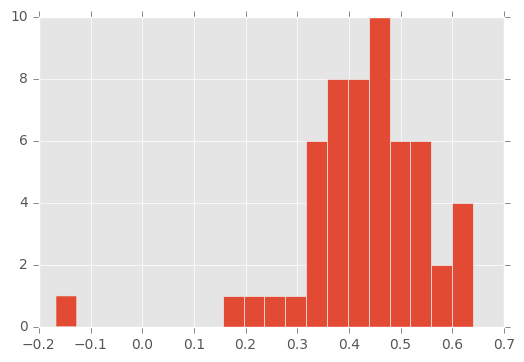

In [34]:
smallcounties = OHcounties['Registered Voters'] < 50000
plt.hist(OHcounties[smallcounties]['TMP'],bins=20)
plt.show()

<p> <i> smallcounties </i> is a set that is created whose registered voters count is less than 50,000. A chart is then created that shows the percentage the county leaned more towards Trumpland rather than Clintonland. We can see from this chart that counties with low registered voter counts leaned more towards Trump rather than Clinton </p>

In [35]:
candperc = pd.DataFrame({c : OH[c] / OH[u'Total Voters'] for c in candidates})
candperc[['County Name','Precinct Name','Total Voters']] = OH[['County Name','Precinct Name','Total Voters']]
candperc = candperc.set_index(['County Name','Precinct Name'])

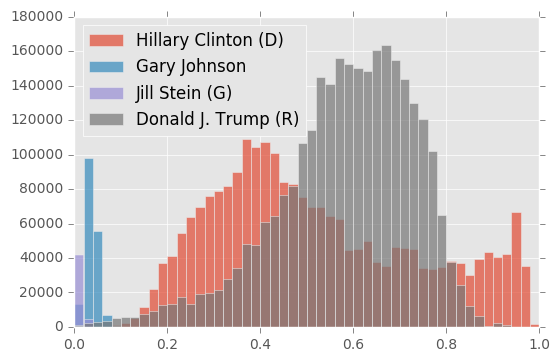

In [43]:
for c in candidates:
    plt.hist(candperc[c],alpha=.7,label=c,bins=50,range=(0,1),normed=0,weights=OH[c])
plt.legend(loc=2)
plt.show()

<p> The code above creates a variable <i> candperc </i> that for each county creates a percentage of voter who voted for each candidate (4 values per county). For each candidate, it then graphs the proportion of which each county voted for him or her </p>

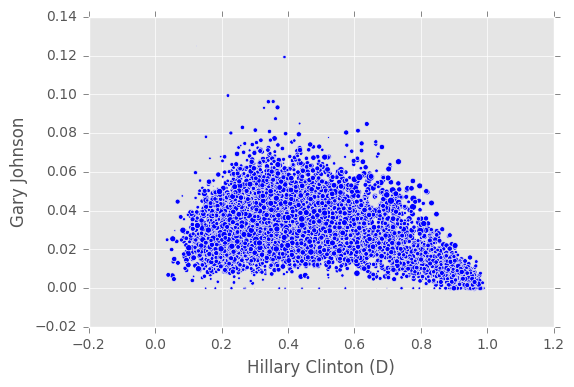

In [37]:
c0, c1 = candidates[0], candidates[1]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

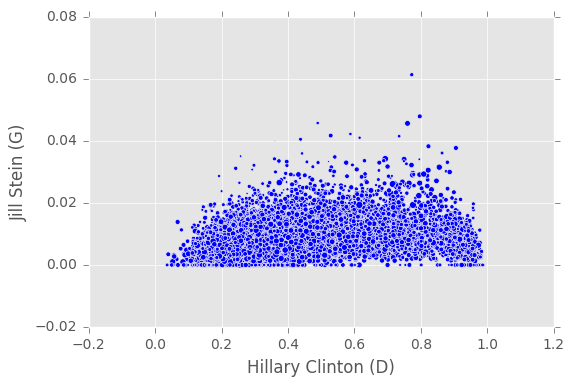

In [38]:
c0, c1 = candidates[0], candidates[2]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

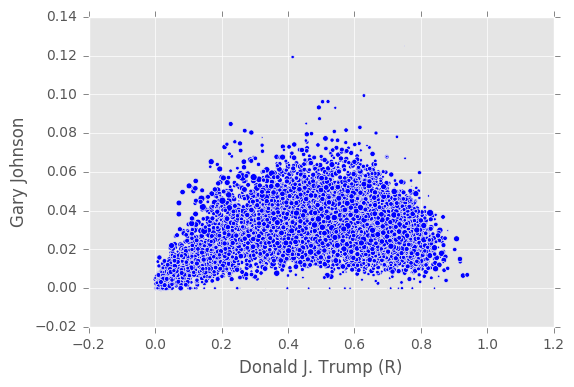

In [39]:
c0, c1 = candidates[3], candidates[1]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

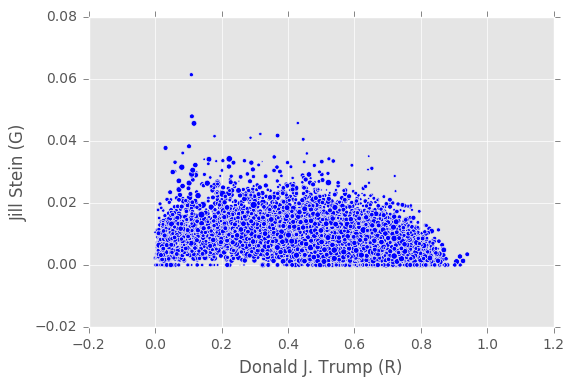

In [40]:
c0, c1 = candidates[3], candidates[2]; plt.scatter(candperc[c0],candperc[c1],s = OH['Total Voters']/50)
plt.xlabel(c0)
plt.ylabel(c1)
plt.show()

<p> The above 4 graphs display a scatter plot that compares two candidates and the proportion of voters who voted for the candidate for each country </p>

In [41]:
taus = pd.DataFrame([[stats.kendalltau(candperc[candperc['Total Voters'] > 100][c0],candperc[candperc['Total Voters'] > 100][c1])[0] for c0 in candidates] for c1 in candidates])
taus = taus.rename({i:candidates[i] for i in range(4)})
taus = taus.rename(columns = {i:candidates[i] for i in range(4)})
taus

,Hillary Clinton (D),Gary Johnson,Jill Stein (G),Donald J. Trump (R)
Hillary Clinton (D),1.000000,-0.117957,0.206878,-0.942552
Gary Johnson,-0.117957,1.000000,0.099360,0.075659
Jill Stein (G),0.206878,0.099360,1.000000,-0.227611
Donald J. Trump (R),-0.942552,0.075659,-0.227611,1.000000


<p> A table is created that compares each candidate with each other. The <i> stats.kendalltau </i> calculation is the Kendall rank correlation coefficient to measure the association between 2 given quantities. </p>